# Background Problem

- Based on this [reference](https://www.sydle.com/blog/credit-score-66688f2a23f910085db97011), credit score is a metric used to determine credit worthiness of a customer. In other words, this score reveals how reliable a customer is in their ability to pay off their debt.
- From a banking perspective as a lender, the ability to identify customers' credit scores will lower the risk of non-performing loans. Consequently, this **will reduce the bank's financial risk by granting credit only to customers with good credit scores.**

# Objective

- In this project, I will analyze and create a classification model using a [dataset](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data) containing banking customer data.

- Since the goal of the project to identify customers with good credit scores, here are the confusion matrix elements:
    - `Positive class: good credit score`
    - `Negative class: standard or bad credit score`
    - TP: customers with good credit scores classified as good credit scores
    - FN: customers with **good credit scores classified as bad or standard credit scores**
    - FP: customers with **bad or standard credit scores classified as good credit scores**
    - TN: customers with bad or standard credit scores classified as bad or standard credit scores

## Consideration

- The chosen metric for the model is precission to decrease the probability of negative class classified as positive class.

$$
precission = \frac{TP}{TP + FP}
$$

- To build a robust model, **this project aims to build a model with minium of 90% precission**
- These are machine learning algorithms to be used to build the model using cross-validation technique:
    - knn
    - svm
    - decision tree
    - random forest
    - boosting
- The best model from cross-validation will be enhanced through hyperparameter tuning.

In [53]:
from os.path import join as path_join
import pandas as pd
import numpy as np
import re

import const

# Data Loading

In [54]:
df = pd.read_csv(
    path_join(const.DS_DIR_PATH, const.DS_FILE_NAME),
    low_memory=False
)

In [55]:
df.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Missing Values Inspection

In [57]:
# print columns containing missing values
df[df.columns[df.isna().any()]].isna().sum()

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

## Columns Descriptions

In [58]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

- ID: row id
- Customer_ID: customer Id
- month: month of the row recorded (nominal)
- Name: name (nominal)
- Age: age (nominal)
- SSN: social security number (nominal)
- Occupation: job occupation (nominal)
- Annual_Income: annual income (USD) (float)
- Monthly_Inhand_Salary: monthly base salary (float)
- Num_Bank_Accounts: number of bank account (int)
- Num_Credit_Card: number of credit card held (int)
- Interest_Rate: interest rate (%) of the credit card 
	- <p style="color: red">needs to converted into decimal form (/100)</p>
	- <p style="color: red">should be float</p>
- Num_of_Loan: number of loans taken from the bank
	- <p style="color: red">some data contains char, ex: 3_, -100</p>
	- <p style="color: red">should be int</p>
- Type_of_Loan: types of loan taken (nominal)
	-  <p style="color: red">some data contains multiple category, ex: 'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified'</p>
- Delay_from_due_date: `average` number of days delayed from payment date (float)
- Num_of_Delayed_Payment: avg number of payments delayed
	- <p style="color: red">some data contains char, ex: 0_</p>
	- <p style="color: red">should be float</p>
- Changed_Credit_Limit: % change of credit card limit
	- <p style="color: red">some data contains only char, ex: _</p>
	- <p style="color: red">already in ratio decimal form</p>
	- <p style="color: red">should be float</p>
- Num_Credit_Inquiries: number of credit card inquiries (int)
- Credit_Mix: credit mix classification
- Outstanding_Debt: remaining debt to be paid (USD)
	- <p style="color: red">some data contains only char, ex: 1283.37_</p>
	- <p style="color: red">should be float</p>
- Credit_Utillization_Ratio: utillization ratio of credit card (float)
	- <p style="color: red">already in ratio decimal form</p>
- Credit_History_Age: age of credit history
	- <p style="color: red">the age represented by years and month, ex: 22 Years and 3 Months</p>
	- <p style="color: red">can be converted into months</p>
	- <p style="color: red">should be float</p>
- Payment_of_Min_Amount: whether only the minimum amount was paid (binary nominal)
	- <p style="color: red">there's another category: NM, could be miss-typed</p>
- Total_EMI_per_month: monthly EMI payments (USD) (float)
- Amount_invested_monthly: monthly amount invested (USD)
	- <p style="color: red">some data contains number and _, ex: __10000__</p>
	- <p style="color: red">10000 is also way too high number compared to others</p>
	- <p style="color: red">should be float</p>
- Payment_Behaviour: payment behaviour of the customer (ordinal)
	- `ordinal level (low to high):`
		1. Low_spent_Small_value_payments
		2. Low_spent_Medium_value_payments
		3. Low_spent_Large_value_payments
		4. High_spent_Small_value_payments
		5. High_spent_Medium_value_payments
		6. High_spent_Large_value_payments
- Monthly_Balance: balance amount of the month (float)
- Credit_Score: target variable (one vs all) (encoded)
	- 1: Good
	- 0: Standard & Poor

## Data Understanding & Data Type Adjustments

- As stated on columns descriptions section, some columns that supposed to contain numerical values are having char on the data, such as: _
- Some columns also contain negative values, such as age, which not supposed to happen.
- Thus in this section, I will try to analyze the data and identify why these values are present.

In this analysis, I will drop several columns, such as:
- ID & customer ID: these columns just containing identifiers that are not important to analyze
- name: it just contains customer's name that is also not important to analyze.
- SSN: based on this [reference](https://www.ssa.gov/history/ssnmyth.html#:~:text=Footnote%3A%20It%20is%20true%20that,place%20of%20birth%2C%20or%20race), SSN also doesn't contain important information

	> It is true that the application form for an SSN asks for identfying information, such as date of birth, place of birth, parents' names, and (optionally) the applicant's race. `But none of this identifying information is encoded in the SSN itself--not the person's date of birth, place of birth, or race.`

In [59]:
df_clean = df.copy()

In [60]:
# drop unused columns
df_clean = df_clean.drop(columns=[
    "ID",
    "Customer_ID",
    "Name",
    "SSN"
])

In [61]:
def remove_specific_char_on_num_series(series: pd.Series, char_to_remove: str)->pd.Series:
	"""
	Remove specific char from data inside a series

         params:
             series (Series): data source
             char_to_remove (str): char that needs to be removed from the series
	
    	return:
             cleaned series that doesn't contain any char
	"""
	
	return series.apply(lambda clean_str: clean_str.replace(char_to_remove, ""))

In [62]:
def get_rows_index_with_specific_char(series: pd.Series, char_to_find: str)->list:
	"""
    Return index of rows that contains specific char inside a series
    
    	------------------------
    	Ex:
    	char_to_find = "_"
    
    	Results:
    	500_
    	400_
    	------------------------

         params:
             series (Series): data source
             char_to_find (str): char to find in a series

        return:
            idx_contain_char (list): index of rows that contain any char
	"""

	idx_contain_char = []

	for idx, val in series.items():
		if((not pd.isna(val)) and (val != None) and (val != np.nan)):
			if(str(val).find(char_to_find)!=-1):
				idx_contain_char.append(idx)

	return idx_contain_char

In [63]:
def get_unique_chars_on_numerical_series(series: pd.Series)->set:
	"""
    Return unique set of chars that appear in a numerical series

        param:
            series (Series): data source

        return:
            char_set (set): list of unique chars in a numerical series
	"""

	chars_set = set()
	
	# loop through each item in series
	for num in series:
		if((num != None) and (num != np.nan) and (not pd.isna(num))):
			for s in str(num):
				if(not str(s).isdigit()):
					chars_set.add(s)

	return chars_set

In [64]:
def get_rows_index_with_chars(series: pd.Series)->list:
	"""
	Get index of rows that contain any character

    	------------
    	Ex:
    	500_
    	-400
    	------------
    
    	param:
            series (Series) -> data source

        return:
            row_index_with_char (list) -> list containing index of rows with any character
	"""

	row_index_with_char = []

	for idx, val in series.items():
		if((val != None) and (val != np.nan) and (not pd.isna(val))):
			if(not str(val).isnumeric()):
				row_index_with_char.append(idx)
	
	return row_index_with_char

In [65]:
def change_series_data_type(series: pd.Series, new_data_type: str)->pd.Series:
	"""
    Return series with specified data type
	
    	params:
            series (Series)  -> series that need data type adjustment
            new_data_type (str) -> specified data type

        return:
            series (Series) -> series with new data type
	"""

	return series.astype(new_data_type)

### Interest Rate

In [66]:
df_clean["Interest_Rate"].isna().sum()

0

In [67]:
df_clean["Interest_Rate"].describe().round(2)

count    100000.00
mean         72.47
std         466.42
min           1.00
25%           8.00
50%          13.00
75%          20.00
max        5797.00
Name: Interest_Rate, dtype: float64

- Interest rate contains credit card's rate of interest (%)
- Highest interest rate is 5797
- I would assume that this interest rate hasn't been changed to decimal form
- Thus, I will divide all interest rates with 100

#### Divide Interest Rate by 100

In [68]:
df_clean["Interest_Rate"] = df_clean["Interest_Rate"]/100

In [69]:
df_clean["Interest_Rate"].describe().round(2)

count    100000.00
mean          0.72
std           4.66
min           0.01
25%           0.08
50%           0.13
75%           0.20
max          57.97
Name: Interest_Rate, dtype: float64

#### Change Data Type into Float

In [70]:
df_clean["Interest_Rate"] = change_series_data_type(df_clean["Interest_Rate"], "float")

### Month

In [71]:
df_clean["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

> There's nothing wrong with month in dataframe

## Age

In [72]:
# get age that contains char
age_with_char_idx = get_rows_index_with_chars(df_clean["Age"])
age_with_char = df_clean.loc[age_with_char_idx]["Age"]

In [73]:
age_with_char

2        -500
8         28_
54        34_
58        30_
71        24_
         ... 
99933     38_
99937    -500
99942     48_
99963    -500
99987     28_
Name: Age, Length: 5825, dtype: object

In [74]:
# get list of uniqe chars present in age
get_unique_chars_on_numerical_series(age_with_char)

{'-', '_'}

In [75]:
# identify age with _
age_with_char[age_with_char.str.contains("_")].unique()

array(['28_', '34_', '30_', '24_', '33_', '35_', '31_', '40_', '37_',
       '54_', '21_', '20_', '43_', '38_', '18_', '2111_', '46_', '16_',
       '19_', '47_', '53_', '25_', '27_', '55_', '42_', '48_', '49_',
       '50_', '32_', '22_', '17_', '29_', '15_', '51_', '26_', '39_',
       '14_', '36_', '44_', '7670_', '45_', '23_', '41_', '52_', '733_',
       '5769_', '4383_', '56_', '2650_', '3307_', '6962_', '5589_',
       '6556_', '1447_', '8153_', '3834_', '6744_', '6471_', '7723_',
       '7640_', '6408_', '3502_', '7316_', '1102_', '8669_', '2463_',
       '6666_', '3055_', '1248_', '2220_', '2159_', '4583_', '3988_',
       '2155_', '6770_', '1843_', '1367_', '3742_', '2171_', '5109_',
       '3984_', '2474_', '5046_', '7715_', '2329_', '707_', '844_',
       '2756_', '2037_', '902_', '8523_', '3640_', '3998_', '3712_',
       '2097_', '8348_', '5373_', '3291_', '2994_', '3339_', '2812_',
       '3578_', '3564_', '1794_', '737_', '4301_', '2846_', '2373_',
       '1188_', '8207

In [76]:
# identify age with _
age_with_char[age_with_char.str.contains("-")].unique()

array(['-500'], dtype=object)

In [77]:
print("proportion of age with char + negative age in dataset: {}%".format(
	round(
		(age_with_char.shape[0]/df_clean.shape[0])*100, 
		2
	)
))

proportion of age with char + negative age in dataset: 5.83%


- Age column contains 2 char, such as: - and _

- Customers' ages that contains - are all having value of -500
- Customers' ages that contains _ are having arbitrary numbers

- `The analysis shows that these values are present in a way that doesn't make sense`
- Unfortunatelly, there's no documentation of how these values are present in the dataset and there's no answer from the data collector. Thus, it's dangerous to make assumption why these data are present.

- Based on the analysis, I will assume that these values are present because of sytem error
- `I will assign these rows as missing values`

#### Assign missing value to age with char (-, _)

In [78]:
# assign np.nan to age with char
df_clean.loc[age_with_char_idx, "Age"] = np.nan

In [79]:
# change data type age into int64
df_clean["Age"] = change_series_data_type(df_clean["Age"], "Int64")

## Annual Income

In [80]:
df_clean["Annual_Income"].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

> Some annual_income data contain _

In [81]:
# get index of annual income with char
annual_income_with_char_idx = get_rows_index_with_chars(df_clean["Annual_Income"])
len(annual_income_with_char_idx)

100000

In [82]:
annual_income_with_char = df_clean.loc[annual_income_with_char_idx]

In [83]:
get_unique_chars_on_numerical_series(annual_income_with_char["Annual_Income"])

{'.', '_'}

> Annual income contains 2 chars, such as: . and _

- annual income with . indicating that it's a floating number
- Thus, I will clean annual income with _ only

In [84]:
# update annual income with char idx
annual_income_with_char_idx = get_rows_index_with_specific_char(
	df_clean["Annual_Income"], "_"
)

In [85]:
# update annual income with char series
annual_income_with_char = df_clean.loc[annual_income_with_char_idx]["Annual_Income"]

In [86]:
annual_income_with_char

10        34847.84_
27        30689.89_
32        35547.71_
56        34081.38_
66       114838.41_
            ...    
99959     38321.39_
99974     16680.35_
99981      37188.1_
99993     39628.99_
99999     39628.99_
Name: Annual_Income, Length: 6980, dtype: object

In [87]:
annual_income_without_char = df_clean.drop(
    index=annual_income_with_char_idx
).loc[:, "Annual_Income"]

annual_income_without_char

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99994    39628.99
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
Name: Annual_Income, Length: 93020, dtype: object

<Axes: >

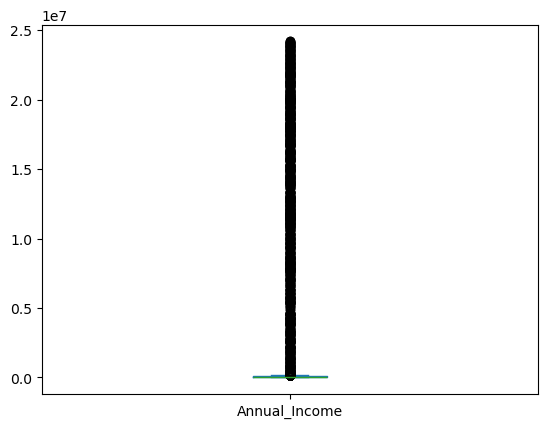

In [88]:
# show boxplot of annual income without char _
change_series_data_type(annual_income_without_char, "float").plot(kind="box")

<Axes: >

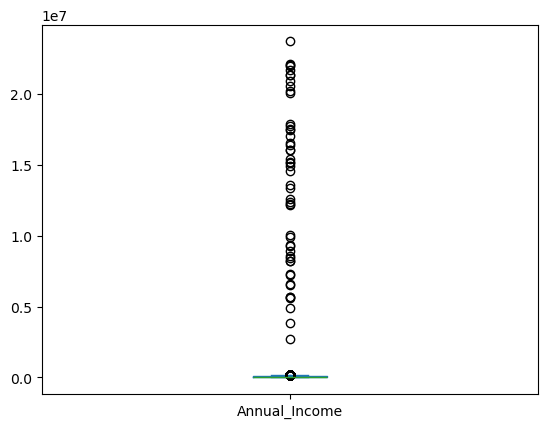

In [89]:
# show boxplot of annual income with char _
change_series_data_type(
	remove_specific_char_on_num_series(annual_income_with_char, "_"),
	"float"
).plot(kind="box")

- The boxplot shown that annual incomes with _ are subset of clean annual income (without _), indicating these values are normal values in the dataset
- I will assume _ appear because of misstype or system failure
- Thus, in this case `it's safe to just remove the _ from annual income and use the data for analysis`

#### Remove _ from annual income

In [90]:
# remove _ from annual income
df_clean["Annual_Income"] =\
	remove_specific_char_on_num_series(df_clean["Annual_Income"], "_")

#### Change data type of annual income

In [91]:
df_clean["Annual_Income"] = change_series_data_type(df_clean["Annual_Income"], "float")

### Occupation

In [92]:
df_clean["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

> There's a weird occupation _______ present in the dataframe

I will analyze why there's an occupation __ in the dataframe by comparing annual_income with clean occupation.

My assuption is customers with occupation __ are shy about their job and they don't want to reveal it. Thus, annual_income is the most appropriate variable to used for comparing

In [93]:
# get series with occupation __
occupation_with_underscore_idx = df_clean[df_clean["Occupation"]=="_______"].index
occupation_ = df_clean.iloc[occupation_with_underscore_idx]
occupation_

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,January,<NA>,_______,34847.84,3037.986667,2,4,0.06,1,Credit-Builder Loan,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,January,34,_______,143162.64,12187.220000,1,5,0.08,3,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,March,34,_______,143162.64,NaN,1,5,0.08,3,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,May,34,_______,143162.64,12187.220000,1,5,0.08,3,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,June,55,_______,30689.89,2612.490833,2,5,0.04,1,Not Specified,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,January,37,_______,139664.96,11777.746667,3,6,0.12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.2613048966028,Standard
99935,August,38,_______,15319.65,1460.637500,6,7,0.15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.00393809551707,Poor
99937,February,<NA>,_______,22620.79,1722.065833,7,3,0.09,0_,NaN,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.1302899429426,Standard
99943,August,48,_______,22620.79,NaN,6,2,0.09,0,NaN,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.98930293316624,Poor


In [94]:
# get series with clean occupation
occupation_clean = df_clean.drop(index=occupation_with_underscore_idx)
occupation_clean

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,<NA>,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,0.07,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,0.07,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,57.29,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,0.07,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [95]:
occupation_clean["Annual_Income"].describe().round(2)

count       92938.00
mean       176449.06
std       1431056.03
min          7005.93
25%         19453.05
50%         37580.34
75%         72841.32
max      24198062.00
Name: Annual_Income, dtype: float64

In [96]:
occupation_["Annual_Income"].describe().round(2)

count        7062.00
mean       175976.70
std       1410657.27
min          7019.44
25%         19541.26
50%         37395.71
75%         72145.32
max      23467279.00
Name: Annual_Income, dtype: float64

- Mean of annual income for occupation with and without _ are similar \\$175,976.70 vs \\$176,449.06
- The std also similar \\$1,410,657.27 vs \$1,431,056.03

- This indicating that my assumption is wrong, thus occupation with _ are appear due to system failure or misstype

#### Assign unknown to occupation of ____

In [97]:
# assign unknown to occupation of ____
df_clean.loc[occupation_with_underscore_idx, "Occupation"] = "Unknown"

In [98]:
df_clean["Occupation"].unique()

array(['Scientist', 'Unknown', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

### Monthly Inhand Salary

In [99]:
get_unique_chars_on_numerical_series(df_clean["Monthly_Inhand_Salary"])

{'.'}

> This column only contain character ., indicating a floating number

In [100]:
df_clean["Monthly_Inhand_Salary"].dtype

dtype('float64')

- Annual income contains missing values and the data type already float

### Num Bank Accounts

In [101]:
df_clean["Num_Bank_Accounts"].isna().sum()

0

In [102]:
get_unique_chars_on_numerical_series(df_clean["Num_Bank_Accounts"])

{'-'}

> Number of bank accounts souldn't contain negative number

In [103]:
negative_num_bank_accounts = df_clean[df_clean["Num_Bank_Accounts"]<0]
negative_num_bank_accounts

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,March,39,Engineer,128305.76,10434.146667,-1,6,0.01,2_,"Auto Loan, and Not Specified",...,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.9223857499363,High_spent_Large_value_payments,855.9049597507532,Standard
30331,April,40,Engineer,128305.76,NaN,-1,6,0.01,2,"Auto Loan, and Not Specified",...,Good,1151.7_,39.369401,22 Years and 6 Months,No,196.587321,524.3044177743545,Low_spent_Large_value_payments,592.522927726335,Good
30332,May,40,Engineer,128305.76,10434.146667,-1,6,0.01,2,"Auto Loan, and Not Specified",...,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.0966753535676,High_spent_Large_value_payments,936.7306701471217,Good
30333,June,40,Engineer,128305.76,10434.146667,-1,6,0.01,2,"Auto Loan, and Not Specified",...,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.6980690205388,Low_spent_Medium_value_payments,120.12927648015079,Good
30334,July,40,Engineer,128305.76,10434.146667,-1,6,0.01,2,"Auto Loan, and Not Specified",...,Good,1151.7,35.206427,NaN,No,42850.000000,172.99202124673786,High_spent_Large_value_payments,913.8353242539515,Good
30335,August,40,Engineer,22136920.00,NaN,-1,6,0.01,2,"Auto Loan, and Not Specified",...,_,1151.7,38.278518,22 Years and 10 Months,No,196.587321,338.67230317776176,High_spent_Medium_value_payments,758.1550423229277,Good
43689,February,54,Engineer,117851.07,9870.922500,-1,6,0.07,0,NaN,...,Good,607.78,37.286105,20 Years and 6 Months,No,0.000000,668.1444536762707,!@9#%8,588.9477963237292,Poor
43690,March,54,Engineer,117851.07,9870.922500,-1,6,0.07,0,NaN,...,Good,607.78,41.915627,20 Years and 7 Months,No,0.000000,142.31978881674561,High_spent_Large_value_payments,1084.7724611832548,Poor
43691,April,54,Engineer,117851.07,9870.922500,-1,6,0.07,0,NaN,...,Good,607.78,41.799942,20 Years and 8 Months,No,0.000000,467.563922615828,High_spent_Small_value_payments,779.528327384172,Poor
43692,May,54,Engineer,117851.07,9870.922500,-1,6,0.07,0,NaN,...,Good,607.78,46.244581,20 Years and 9 Months,No,0.000000,NaN,High_spent_Large_value_payments,1037.5063384360787,Poor


- Since there are only 21 observations contain negative value of number bank accounts, I will assign these values as missing

#### Assign Negative Num Bank Account as Missing Values

In [104]:
df_clean.loc[negative_num_bank_accounts.index, "Num_Bank_Account"] = np.nan

### Num Credit Card

In [105]:
df_clean["Num_Credit_Card"].dtype

dtype('int64')

In [106]:
df_clean["Num_Credit_Card"].isna().sum()

0

- Num credit card doesn't contain missing values and the data type already int

In [107]:
get_unique_chars_on_numerical_series(df_clean["Num_Credit_Card"])

set()

### Interest Rate

In [108]:
df_clean["Interest_Rate"].isna().sum()

0

- Interest rate doesn't contain missing values and the data type already int

In [109]:
get_unique_chars_on_numerical_series(df_clean["Interest_Rate"])

{'.'}

### Number of Loan

In [110]:
df_clean["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

> some data points in number of loan column contain char, such as: _

In [111]:
num_of_loan_with_char_idx = get_rows_index_with_chars(df_clean["Num_of_Loan"])
len(num_of_loan_with_char_idx)

8661

In [112]:
num_of_loan_with_char = df_clean.loc[num_of_loan_with_char_idx]

In [113]:
num_of_loan_with_char["Num_of_Loan"]

31       -100
34       -100
37         0_
39       -100
53       -100
         ... 
99940      0_
99958      4_
99969    -100
99984      5_
99987    -100
Name: Num_of_Loan, Length: 8661, dtype: object

In [114]:
get_unique_chars_on_numerical_series(num_of_loan_with_char["Num_of_Loan"])

{'-', '_'}

- There are two types of char inside number of loan, such as: - and _

In [115]:
# get unique value of negative number of loan
num_of_loan_with_char.loc[
	num_of_loan_with_char["Num_of_Loan"].str.contains("-"), 
	"Num_of_Loan"
].unique()

array(['-100'], dtype=object)

In [116]:
# get unique value of number of loan with _
num_of_loan_with_char.loc[
	num_of_loan_with_char["Num_of_Loan"].str.contains("_"), 
	"Num_of_Loan"
].unique()

array(['0_', '3_', '2_', '5_', '8_', '9_', '4_', '7_', '1_', '6_', '597_',
       '92_', '1347_', '1185_', '235_', '1459_', '1320_', '630_', '359_',
       '1225_', '131_', '1311_', '1129_', '785_', '143_', '1131_', '27_',
       '1171_', '227_', '378_', '1219_', '527_', '1027_', '696_', '1132_'],
      dtype=object)

In [117]:
print("number of loan contain char proportion: {}%".format(
	round(
		num_of_loan_with_char.shape[0]/df_clean.shape[0],
		2
	)*100
))

number of loan contain char proportion: 9.0%


- all negative number of loan are -100
- number of loan that containing _ are having arbitrary numbers
- `The analysis shows that these values are present in a way that doesn't make sense`
- Unfortunatelly, there's no documentation of how these values are present in the dataset and there's no answer from the data collector. Thus, it's dangerous to make assumption why these data are present.
- Based on the analysis, I will assume that these values are present because of sytem error
- `I will assign these rows as missing values`

#### Assign missing values to num of loan with char (-, _)

In [118]:
# assign np.nan to age with char
df_clean.loc[
	num_of_loan_with_char_idx, 
	"Num_of_Loan"
] = np.nan

#### change data type of num of loan

In [119]:
# change data type age into int64
df_clean["Num_of_Loan"] = change_series_data_type(df_clean["Num_of_Loan"], "Int64")

### Type of Loan

In [120]:
df_clean["Type_of_Loan"].nunique()

6260

In [121]:
df_clean["Type_of_Loan"].isna().sum()

11408

- Type of loan is a category column, containing high cardinality with repetitive values
- Each row seems contain arbitrary values, thus I will drop these columns

#### Drop Type of Loan Column

In [122]:
df_clean = df_clean.drop(columns=["Type_of_Loan"])

### Delay from due date

In [123]:
df_clean["Delay_from_due_date"].isna().sum()

0

In [124]:
df_clean["Delay_from_due_date"]

0         3
1        -1
2         3
3         5
4         6
         ..
99995    23
99996    18
99997    27
99998    20
99999    18
Name: Delay_from_due_date, Length: 100000, dtype: int64

- Delay from due date is average number of days delayed from payment date
- Some values in this column are negative, which are not supposed to be in this column

- I will analyze negative value on this column with credit score, because this [reference](https://www.nerdwallet.com/article/finance/late-bill-payment-reported) says that number of delayed payment affect credit score.

In [125]:
df_clean.loc[
	df_clean["Delay_from_due_date"]<0, 
	"Credit_Score"
].value_counts(normalize=True)

Credit_Score
Good        0.556684
Standard    0.360406
Poor        0.082910
Name: proportion, dtype: float64

- The proportion shows that 90% of the negative delays from the due date are present in good and standard credit scores. Therefore, I will assume that the negative values in this column should be 0

#### Replace negative delay from due date with 0

In [126]:
# replace negative delay with 0
df_clean.loc[
	df_clean["Delay_from_due_date"]<0,
	"Delay_from_due_date"
] = 0

### Credit Score

In [127]:
df_clean["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [128]:
df_clean["Credit_Score"].isna().sum()

0

- Credit score contains 3 clear category good, standard, and poor
- It also doesn't contain missing values
- Thus, this column is ready to be used for further analysis

### Num of Delayed Payment

In [129]:
# inspect unique values in num of delayed payment column
df_clean["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [130]:
num_of_delayed_payment_with_char_idx = get_rows_index_with_chars(df_clean["Num_of_Delayed_Payment"])

In [131]:
len(num_of_delayed_payment_with_char_idx)

3366

In [132]:
df_clean[df_clean["Num_of_Delayed_Payment"]=="0"]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
13,June,28,Teacher,34847.84,3037.986667,2,4,0.06,1,3,...,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good,NaN
72,January,44,Journalist,31370.80,2825.233333,0,5,0.12,2,4,...,421.43,29.519353,NaN,NM,46.616129,154.352781097101,High_spent_Small_value_payments,341.55442316289026,Good,NaN
73,February,44,Journalist,31370.80,2825.233333,1,6,0.12,2,2,...,421.43,28.220481,26 Years and 6 Months,No,46.616129,298.7444693112266,Low_spent_Small_value_payments,227.1627349487646,Good,NaN
74,March,44,Journalist,31370.80,2825.233333,1,6,0.12,2,0,...,421.43,31.046418,26 Years and 7 Months,No,46.616129,140.8206959818371,Low_spent_Medium_value_payments,375.0865082781542,Good,NaN
75,April,44,Journalist,31370.80,2825.233333,1,6,0.12,2,1,...,421.43,30.168030,26 Years and 8 Months,No,46.616129,233.6055264233428,Low_spent_Small_value_payments,292.3016778366485,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,January,44,Media_Manager,16680.35,1528.029167,1,1,0.05,4,4,...,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.73737826046414,Good,NaN
99969,February,45,Media_Manager,16680.35,1528.029167,1,1,0.05,<NA>,3,...,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.04311919908423,Good,NaN
99970,March,45,Media_Manager,16680.35,1528.029167,1,1,0.05,4,1,...,897.16,30.472041,21 Years and 3 Months,No,75011.000000,75.50497238307716,Low_spent_Medium_value_payments,316.1843836936636,Good,NaN
99972,May,1753,Media_Manager,16680.35,1528.029167,1,1,0.05,4,1,...,897.16,37.788217,21 Years and 5 Months,No,41.113561,64.54974829039807,Low_spent_Large_value_payments,317.1396077863426,Standard,NaN


- This column is supposed to be numberical, but some data points contain char, such as: _
- Some of the data also negative, instead of 0 (indicating there's no delayed payment)

In [133]:
# get unique char present in the num of delayed payment column
get_unique_chars_on_numerical_series(df_clean["Num_of_Delayed_Payment"])

{'-', '_'}

In [134]:
# get index of negative num_of_delayed_payment
num_of_delayed_payment_negative_index = get_rows_index_with_specific_char(
	df_clean["Num_of_Delayed_Payment"], 
    "-"
)

In [135]:
num_of_delayed_payment_negative = df_clean.loc[
	num_of_delayed_payment_negative_index
]

In [136]:
num_of_delayed_payment_negative["Num_of_Delayed_Payment"].unique()

array(['-1', '-3', '-2', '-2_', '-1_', '-3_'], dtype=object)

- It looks like there's a pattern, negative number of delayed payment are all in either 1, 2, or 3.
- I will analyze this variable with credit score using my assumption that, high delayed payment will resulting poor credit score.

In [137]:
num_of_delayed_payment_negative.shape

(644, 24)

In [138]:
# get proportion of negative num of delayed payment data among credit score
num_of_delayed_payment_negative["Credit_Score"].value_counts(normalize=True).round(2)

Credit_Score
Good        0.49
Standard    0.38
Poor        0.13
Name: proportion, dtype: float64

- Proportions of credit score on negative delayed payment are decreasing from good to poor.
- Since proportion of negative delayed payment are bigger in good than poor, `I would assume that negative delayed paymets are actually 0.`
- This assumption came from another assumption that high number of delayed payments resulting to worse credit score

In [139]:
# get num of delayed payment that contains - and _
df_clean.loc[
	num_of_delayed_payment_with_char_idx,
	"Num_of_Delayed_Payment"
].unique()

array(['8_', '-1', '3_', '2_', '13_', '14_', '12_', '22_', '4_', '11_',
       '21_', '10_', '183_', '9_', '19_', '24_', '17_', '23_', '20_',
       '-3', '6_', '1_', '16_', '-2', '15_', '26_', '18_', '5_', '25_',
       '7_', '0_', '2569_', '27_', '663_', '-2_', '28_', '-1_', '1323_',
       '2794_', '2219_', '758_', '-3_', '848_', '2237_', '3097_', '2566_',
       '3840_', '2278_', '1087_', '1295_', '3861_', '2142_', '1473_',
       '3920_'], dtype=object)

- number of loan that containing _ are having arbitrary numbers
- `The analysis shows that these values are present in a way that doesn't make sense`
- Based on the analysis, I will assume that these values are present because of sytem error
- `I will assign these rows as missing values`

#### Replace negative number of delayed payment with 0

In [140]:
# replace negative number of delayed payment with 0
df_clean.loc[
    num_of_delayed_payment_negative_index,
	"Num_of_Delayed_Payment"
] = 0

#### Assign missing values to number of delayed payments that contain _

In [141]:
# get index of num_of_delayed_payment that contain _
num_of_delayed_payment_contain_underscore_index = get_rows_index_with_specific_char(
	df_clean["Num_of_Delayed_Payment"], 
    "_"
)

In [142]:
df_clean.loc[
	num_of_delayed_payment_contain_underscore_index,
	"Num_of_Delayed_Payment"
]

6         8_
11        3_
53        3_
54        2_
119      13_
        ... 
99897    10_
99904     7_
99939    19_
99945     6_
99953     7_
Name: Num_of_Delayed_Payment, Length: 2722, dtype: object

In [143]:
df_clean.loc[
	num_of_delayed_payment_contain_underscore_index,
	"Num_of_Delayed_Payment"
]=np.nan

#### Change data type of num of delayed payment into float

In [144]:
df_clean["Num_of_Delayed_Payment"] =\
    df_clean["Num_of_Delayed_Payment"].astype("Float64")

### Changed Credit Limit

In [145]:
df_clean["Changed_Credit_Limit"].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [146]:
get_unique_chars_on_numerical_series(df_clean["Changed_Credit_Limit"])

{'-', '.', '_'}

- There are some chars inside changed_credit_limit such as _, ., and -
- This [reference](https://www.fool.com/the-ascent/credit-cards/how-downgrade-credit-card/#:~:text=Reach%20out%20to%20your%20card,the%20card%20issuer's%20phone%20number) conveys that we can decrease our credit card limit. I would assume that minus changed_credit_limit means that it's decreased
- . char indicating that the rate is on floating point

- `In conclusion, the problem of this column is there's an underscore and it's not supposed to be on the data point`

In [147]:
# get rows' indexes of changed credit limit with underscore
changed_credit_limit_contains_underscore_index = get_rows_index_with_specific_char(
	df_clean["Changed_Credit_Limit"],
	"_"
)

In [148]:
# get df of credit limit with underscore
changed_credit_limit_contains_underscore = df_clean.loc[
	changed_credit_limit_contains_underscore_index
]

changed_credit_limit_contains_underscore

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
2,March,<NA>,Scientist,19114.120,NaN,3,4,0.03,4,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,NaN
65,February,23,Doctor,114838.410,9843.867500,2,5,0.07,3,14,...,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.23560220847847,High_spent_Large_value_payments,785.2583558699787,Good,NaN
66,March,23,Doctor,114838.410,NaN,2,5,0.07,3,11,...,1377.74,35.141567,21 Years and 6 Months,NM,226.892792,470.3857956796373,High_spent_Small_value_payments,547.1081623988198,Good,NaN
109,June,39,Manager,8701.545,519.128750,6,5,0.32,7,23,...,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613407134115,Low_spent_Medium_value_payments,242.43306442147872,Poor,NaN
110,July,39,Manager,8701.545,NaN,6,5,0.32,7,21,...,2602.69,38.465415,NaN,Yes,36.548197,30.471806299271933,Low_spent_Medium_value_payments,264.8928715293409,Poor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,May,28,Writer,29090.500,2472.208333,5,7,0.20,4,11,...,1612.7,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299066480114,High_spent_Medium_value_payments,394.3798029820068,Poor,NaN
99618,March,7490,Writer,142560.360,11773.030000,6,3,0.13,1,24,...,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.7874766731884,High_spent_Large_value_payments,1145.7434294028362,Standard,NaN
99800,January,16,Developer,14937.490,NaN,8,8,0.22,7,44,...,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.58693258712627,Low_spent_Small_value_payments,255.73127246656225,Standard,NaN
99892,May,<NA>,Unknown,85744.120,NaN,6,7,0.11,2,30,...,717.79,29.513156,NaN,Yes,72.099176,88.01045806206517,High_spent_Large_value_payments,792.4246987800681,Standard,NaN


This [reference](https://www.capitalone.com/learn-grow/money-management/credit-limit-increase-affect-credit-score/) says that reducing credit limit will make the credit score to dip.

- Thus, I will inspect changed credit limit with underscore using credit score

In [149]:
# get proportion of credit score on changed credit limit with underscore
changed_credit_limit_contains_underscore["Credit_Score"].\
	value_counts(normalize=True).round(2)

Credit_Score
Standard    0.52
Poor        0.30
Good        0.17
Name: proportion, dtype: float64

In [150]:
# get proportion of credit score on changed credit limit without underscore
df_clean.drop(
	index=changed_credit_limit_contains_underscore_index
)["Credit_Score"].value_counts(normalize=True).round(2)

Credit_Score
Standard    0.53
Poor        0.29
Good        0.18
Name: proportion, dtype: float64

- The proportion of credit scores on credit limit changed with and without underscore are similar.
- Thus, this data appear in a "normal way"
- In this step, `I will identify changed credit limit with underscore as missing values`

#### Assign changed credit limit with _ with missing values

In [151]:
df_clean.loc[
	changed_credit_limit_contains_underscore_index,
	"Changed_Credit_Limit"
]=np.nan

#### Change data type of changed credit limit into float

In [152]:
df_clean["Changed_Credit_Limit"] = df_clean["Changed_Credit_Limit"].astype("float64")

### Num Credit Inquiries

In [153]:
df_clean["Num_Credit_Inquiries"].dtype

dtype('float64')

In [154]:
df_clean["Num_Credit_Inquiries"].isna().sum()

1965

- Num credit inquiries contain missing values and the data type already float

### Credit Mix

In [155]:
df_clean["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

- This (reference)[https://www.equifax.com/personal/education/credit/score/articles/-/learn/what-is-a-credit-mix/#:~:text=Simply%20put%2C%20a%20credit%20mix,of%20calculating%20credit%20scores)%20used] conveys:
	> A credit mix refers to the different types of credit accounts you have: installment loans, revolving debt, mortgage accounts, open accounts

- But, the column are having 4 values, such as: _, good, standard, and bad.
- This column also has similar values as credit score, I would assume that this column appear because system failure.
- Thus, I will drop this column

#### Drop Credit Mix Columns

In [156]:
df_clean = df_clean.drop(columns=["Credit_Mix"])

### Outstanding Debt

In [157]:
get_unique_chars_on_numerical_series(df_clean["Outstanding_Debt"])

{'.', '_'}

- Some values on this column contains underscore

In [158]:
outstanding_debt_with_underscore_index = get_rows_index_with_specific_char(
    df_clean["Outstanding_Debt"],
    "_"
)

In [159]:
outstanding_debt_with_underscore = df_clean.loc[
	outstanding_debt_with_underscore_index
]

In [160]:
outstanding_debt_with_underscore["Outstanding_Debt"]

87       1328.93_
142      1283.37_
368      2797.17_
632      3818.57_
703       343.84_
           ...   
99842     1095.9_
99862    1350.85_
99930    1453.61_
99984     3571.7_
99985     3571.7_
Name: Outstanding_Debt, Length: 1009, dtype: object

In [161]:
outstanding_debt_without_underscore = df_clean.drop(index=outstanding_debt_with_underscore_index)

In [162]:
outstanding_debt_without_underscore["Outstanding_Debt"]

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 98991, dtype: object

<Axes: >

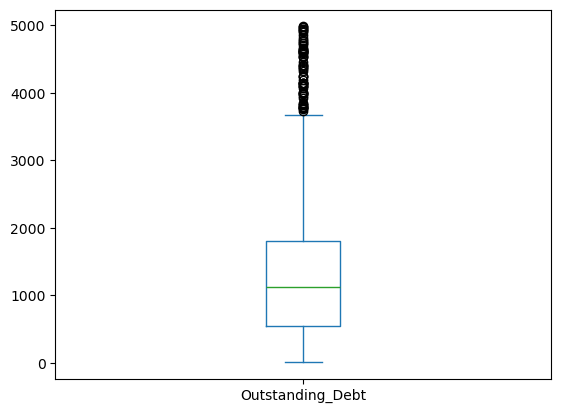

In [163]:
change_series_data_type(
	remove_specific_char_on_num_series(outstanding_debt_with_underscore["Outstanding_Debt"], "_")
	, "float64"
).plot(kind="box")

<Axes: >

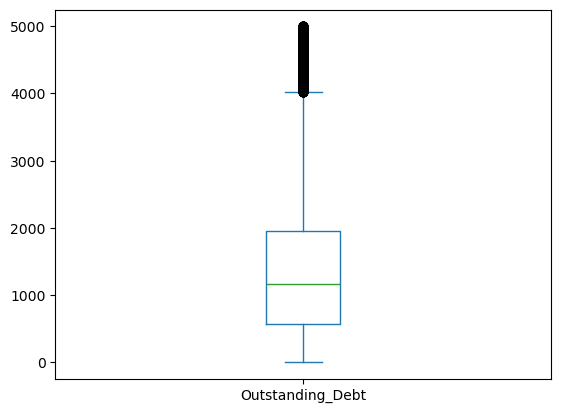

In [164]:
outstanding_debt_without_underscore["Outstanding_Debt"].astype("float64").plot(kind="box")

- These boxlot shown that distribution of outstanding debt with and without underscore are similar. 
- Thus, I assume that underscore appear on the data because of system failure
- In conclusion, I will remove the underscore symbol

#### Remove underscore from outstanding debt

In [165]:
df_clean.loc[
	outstanding_debt_with_underscore_index,
	"Outstanding_Debt"
] = remove_specific_char_on_num_series(
	outstanding_debt_with_underscore["Outstanding_Debt"],
	"_"
)

In [166]:
df_clean.loc[
	outstanding_debt_with_underscore_index,
	"Outstanding_Debt"
]

87       1328.93
142      1283.37
368      2797.17
632      3818.57
703       343.84
          ...   
99842     1095.9
99862    1350.85
99930    1453.61
99984     3571.7
99985     3571.7
Name: Outstanding_Debt, Length: 1009, dtype: object

#### Change data type of outstanding debt into float

In [167]:
df_clean["Outstanding_Debt"] = change_series_data_type(df_clean["Outstanding_Debt"], "float64")

### Credit Utilization Ratio

In [169]:
df_clean["Credit_Utilization_Ratio"].dtype

dtype('float64')

In [170]:
df_clean["Credit_Utilization_Ratio"].isna().sum()

0

- Credit utilization ratio doesn't contain missing values and the data type already float

In [171]:
get_unique_chars_on_numerical_series(df_clean["Credit_Utilization_Ratio"])

{'.'}

### Credit History Age

In [172]:
df_clean["Credit_History_Age"].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [173]:
def extract_total_months_from_year_month_str(year_month_str: str) -> int:
	"""
	Extract total months from :year_month_str

        param:
            year_month_str (str): data source

    	return:
             total months (int)
	"""
	if((year_month_str!=None) 
		and (year_month_str!=np.nan) 
		and (pd.notna(year_month_str))
      ):
		year_month_str = str(year_month_str).lower()

		years = re.search(r'(\d+)\s*years', year_month_str)
		months = re.search(r'(\d+)\s*months', year_month_str)

		years_value = int(years.group(1)) if years else 0
		months_value = int(months.group(1)) if months else 0
		
		return (years_value*12)+months_value
	else:
		# return original values if it's null
		return year_month_str    

#### Extract total months from credit history age

In [174]:
df_clean["Credit_History_Age"] = df_clean["Credit_History_Age"].\
	apply(extract_total_months_from_year_month_str)

In [175]:
df_clean["Credit_History_Age"]

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

### Payment of Min Amount

In [176]:
df_clean["Payment_of_Min_Amount"].unique()

array(['No', 'NM', 'Yes'], dtype=object)

- The column contains 3 unique values, no, nm, and yes.
- This column should be contain only no and yes (indicating whether only minimum amount was paid)
- Since there are many inappropriate values appearing in the dataset due to a system failure, nm might have appeared under similar circumstances
- Thus, I will replace nm as missing values

In [177]:
df_clean[df_clean["Payment_of_Min_Amount"]=="NM"]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
14,July,28,Teacher,34847.84,NaN,2,4,0.06,1,3,...,605.03,31.131702,325.0,NM,18.816215,70.10177420755677,High_spent_Medium_value_payments,464.8806778859809,Good,NaN
26,March,55,Entrepreneur,30689.89,2612.490833,2,5,0.04,1,3,...,632.46,32.301163,209.0,NM,16.415452,83.40650880252501,High_spent_Medium_value_payments,411.42712287098345,Standard,NaN
33,February,21,Developer,35547.71,NaN,7,5,0.05,0,9,...,943.86,27.020360,369.0,NM,0.000000,74.44364104999623,High_spent_Medium_value_payments,460.88727561667037,Standard,NaN
41,February,31,Unknown,73928.46,5988.705000,4,5,0.08,0,8,...,548.20,42.769864,384.0,NM,0.000000,172.93921446875606,Low_spent_Medium_value_payments,705.931285531244,Good,NaN
48,January,33,Lawyer,131313.40,11242.783333,0,1,0.08,2,0,...,352.16,32.200509,367.0,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,April,47,Developer,22620.79,1722.065833,7,3,0.09,0,27,...,642.46,26.730863,354.0,NM,0.000000,205.75607405146,Low_spent_Small_value_payments,256.45050928187334,Poor,NaN
99949,June,33,Media_Manager,59146.36,4908.863333,3,6,0.06,1,6,...,418.03,24.975531,246.0,NM,26.778419,91.32166373670609,High_spent_Medium_value_payments,622.7862503245857,Standard,NaN
99968,January,44,Media_Manager,16680.35,1528.029167,1,1,0.05,4,4,...,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.73737826046414,Good,NaN
99979,April,49,Writer,37188.10,3097.008333,1,4,0.05,3,3,...,620.64,36.979007,360.0,NM,84.205949,215.48638555294247,Low_spent_Small_value_payments,300.00849835554664,Good,NaN


#### Assign NM as missing values

In [178]:
df_clean.loc[
    df_clean["Payment_of_Min_Amount"]=="NM", "Payment_of_Min_Amount"
] = np.nan

In [179]:
df_clean["Payment_of_Min_Amount"].unique()

array(['No', nan, 'Yes'], dtype=object)

### Total EMI per month

In [180]:
df_clean["Total_EMI_per_month"].dtype

dtype('float64')

In [181]:
df_clean["Total_EMI_per_month"].isna().sum()

0

- The column doesn't contain missing values and the data type is alreday float

In [182]:
get_unique_chars_on_numerical_series(df_clean["Total_EMI_per_month"])

{'.'}

### Amount invested monthly

In [183]:
get_unique_chars_on_numerical_series(df_clean["Amount_invested_monthly"])

{'.', '_'}

In [184]:
amount_invested_monthly_with_underscore_index =\
get_rows_index_with_specific_char(df_clean["Amount_invested_monthly"], "_")

In [185]:
amount_invested_monthly_with_underscore = df_clean.loc[
	amount_invested_monthly_with_underscore_index
]

In [186]:
amount_invested_monthly_with_underscore["Amount_invested_monthly"]

18       __10000__
23       __10000__
28       __10000__
121      __10000__
142      __10000__
           ...    
99879    __10000__
99882    __10000__
99919    __10000__
99951    __10000__
99973    __10000__
Name: Amount_invested_monthly, Length: 4305, dtype: object

- \_\_10000\_\_ is a weird value to be appear in the data

In [187]:
df_clean.drop(
	index=amount_invested_monthly_with_underscore_index
)["Amount_invested_monthly"].astype("float64").describe().round(2)

count    91216.00
mean       195.54
std        199.56
min          0.00
25%         72.24
50%        128.95
75%        236.82
max       1977.33
Name: Amount_invested_monthly, dtype: float64

- Average amount invested monthly is 196 and the median is 128.
- If I assume \_\_ are miss-typed and use 10,000 for true value. This doesn't make any sense due to maximum value of amount invested monthly is 1,977.

- Thus, `I conclude that \_\_10000\_\_ occur because of system error and I will assign as missing values`

#### Assign \_\_10000\_\_ as missing values

In [189]:
df_clean.loc[
	amount_invested_monthly_with_underscore_index,
	"Amount_invested_monthly"
] = np.nan

#### Change data type of amount invested monthly to float

In [191]:
df_clean["Amount_invested_monthly"] = df_clean["Amount_invested_monthly"].astype("float64")

### Payment Behaviour

In [146]:
df_eda["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

- There's a weird value "!@9#%8" appear on the column that doesn't have any meaning

In [193]:
payment_behaviour_weird = df_clean[df_clean["Payment_Behaviour"]=="!@9#%8"]

In [194]:
payment_behaviour_weird

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
5,June,23,Scientist,19114.12,NaN,3,4,0.03,4,8,...,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,340.4792117872438,Good,NaN
16,January,34,Unknown,143162.64,12187.220000,1,5,0.08,3,5,...,1303.01,28.616735,213.0,No,246.992319,168.413703,!@9#%8,1043.3159778669492,Good,NaN
32,January,21,Developer,35547.71,2853.309167,7,5,0.05,0,5,...,943.86,39.797764,368.0,Yes,0.000000,276.725394,!@9#%8,288.60552234930395,Standard,NaN
47,August,31,Lawyer,73928.46,5988.705000,4,5,0.08,0,8,...,548.20,31.580990,390.0,No,0.000000,42.635590,!@9#%8,796.2349097481042,Good,NaN
54,July,<NA>,Lawyer,10909427.00,NaN,0,1,0.08,2,0,...,352.16,26.947565,373.0,No,911.220179,930.391898,!@9#%8,326.24183015224526,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,April,33,Media_Manager,59146.36,4908.863333,2,5,0.06,1,8,...,418.03,28.091458,244.0,No,26.778419,183.584149,!@9#%8,530.5237651921971,Standard,NaN
99980,May,49,Writer,37188.10,3097.008333,1,4,0.05,3,7,...,620.64,27.495263,361.0,No,84.205949,78.497727,!@9#%8,396.99715733756386,Standard,NaN
99982,July,50,Writer,37188.10,3097.008333,1,4,0.05,3,7,...,620.64,38.850680,363.0,No,84.205949,82.825572,!@9#%8,412.66931176433695,Good,NaN
99989,June,28,Unknown,20002.88,1929.906667,10,8,0.29,5,33,...,3571.70,33.359987,73.0,Yes,60.964772,74.366603,!@9#%8,307.65929119739087,Standard,NaN


- This [reference](https://www.capitalone.com/learn-grow/money-management/payment-history/#:~:text=Credit%20scores%20help%20lenders%20make,paying%20your%20bills%20on%20time) shown that payment behaviour affecting credit score.

- Thus, I will analyze payment behaviour using credit score

In [195]:
payment_behaviour_weird["Credit_Score"].value_counts(normalize=True)

Credit_Score
Standard    0.525263
Poor        0.292763
Good        0.181974
Name: proportion, dtype: float64

In [196]:
df_clean.drop(
	index=payment_behaviour_weird.index
)["Credit_Score"].value_counts(normalize=True)

Credit_Score
Standard    0.532273
Poor        0.289751
Good        0.177976
Name: proportion, dtype: float64

- The proportion of credit scores on credit limit changed with and without underscore are similar.
- Thus, this data appear in a "normal way"
- In this step, I will identify changed credit limit with underscore as missing values

#### Assign weird payment behaviour with missing values

In [197]:
df_clean.loc[
	payment_behaviour_weird.index,
	"Payment_Behaviour"
] = np.nan

### Monthly Balance

In [203]:
get_unique_chars_on_numerical_series(df_clean["Monthly_Balance"])

{'-', '.', '_'}

- Some values in monthly balance contain 3 different types of char, such as: -, ., and _
- This [reference](https://www.chase.com/personal/credit-cards/education/basics/negative-credit-card-balance#:~:text=A%20negative%20credit%20card%20balance%20is%20when%20your%20balance%20is,credit%20returned%20to%20your%20account) says that negative monthly balance means that credit card company owes customers with negative monthly balance
- . in the data shows that the values are floating point
- Thus, the only problem of this column has is that some values contain underscore

In [204]:
monthly_balance_with_underscore_index = get_rows_index_with_specific_char(
	df_clean["Monthly_Balance"], 
	"_"
)

In [207]:
monthly_balance_with_underscore = df_clean.loc[
	monthly_balance_with_underscore_index
]

In [208]:
monthly_balance_with_underscore["Monthly_Balance"]

5545     __-333333333333333333333333333__
26177    __-333333333333333333333333333__
29158    __-333333333333333333333333333__
35570    __-333333333333333333333333333__
38622    __-333333333333333333333333333__
60009    __-333333333333333333333333333__
75251    __-333333333333333333333333333__
82918    __-333333333333333333333333333__
83255    __-333333333333333333333333333__
Name: Monthly_Balance, dtype: object

- Findings above shown that there are some values appear in a way that not supposed to be.
- There are only 9 rows with weird monthly balance value 
- Thus, it's hard to find any pattern to see why did these value appear in the dataframe.
- In this, step I will assing missing value to these rows

#### Assign missing values to row with weird monthly balance

In [210]:
df_clean.loc[
	monthly_balance_with_underscore_index,
	"Monthly_Balance"
] = np.nan

#### change data type of monthly balance into float

In [212]:
df_clean["Monthly_Balance"] = change_series_data_type(df_clean["Monthly_Balance"], "float64")

## Duplicated Rows Identification

In [214]:
df_clean.duplicated().sum()

0

In [215]:
df_clean.duplicated().sum()

0

> There's no duplicated rows

## Missing Values Identification

In [216]:
df_clean.isna().sum()

Month                            0
Age                           5825
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                   8661
Delay_from_due_date              0
Num_of_Delayed_Payment        9724
Changed_Credit_Limit          2091
Num_Credit_Inquiries          1965
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age            9030
Payment_of_Min_Amount        12007
Total_EMI_per_month              0
Amount_invested_monthly       8784
Payment_Behaviour             7600
Monthly_Balance               1209
Credit_Score                     0
Num_Bank_Account            100000
dtype: int64

- There are some missing values in Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance

- I will examine whether these miising values are MCAR, MAR, or MNAR